In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Load Iris dataset

In [14]:
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 2. Extract required features

In [15]:
req_cols = ['SepalLengthCm', 'SepalWidthCm']
req_features = data[req_cols]
req_features

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### 3. Pairwise Euclidean distances between data points

In [16]:
def euclidean_distance(p1, p2):
    p1 = np.array(p1)
    p2 = np.array(p2)
    return np.sqrt(np.sum((p1 - p2)**2))

In [17]:
def pairwise_dist(df):
    n = df.shape[0]
    dists = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            dists[i][j] = euclidean_distance(df.iloc[i], df.iloc[j])
    return np.array(dists)

In [18]:
dist_matrix = pairwise_dist(req_features)
dist_matrix

array([[0.        , 0.53851648, 0.5       , ..., 1.48660687, 1.1045361 ,
        0.94339811],
       [0.53851648, 0.        , 0.28284271, ..., 1.6       , 1.36014705,
        1.        ],
       [0.5       , 0.28284271, 0.        , ..., 1.81107703, 1.5132746 ,
        1.21655251],
       ...,
       [1.48660687, 1.6       , 1.81107703, ..., 0.        , 0.5       ,
        0.6       ],
       [1.1045361 , 1.36014705, 1.5132746 , ..., 0.5       , 0.        ,
        0.5       ],
       [0.94339811, 1.        , 1.21655251, ..., 0.6       , 0.5       ,
        0.        ]])

### 4. Minimum Spanning Tree using Prim's algorithm

In [19]:
def graph_plot(df, graph):
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', color='blue')
    r, c = graph.shape
    for i in range(r):
        for j in range(c):
            if graph[i][j] != 0:
                plt.plot([df.iloc[i, 0], df.iloc[j, 0]], [df.iloc[i, 1], df.iloc[j, 1]], color='grey')
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])

In [20]:
def minimum_spanning_tree(adj_matrix):
    n = len(adj_matrix)
    mst = [None] * n
    key = [float('inf')] * n
    visited = [False] * n

    mst[0] = -1
    key[0] = 0

    for _ in range(n):
        min_key = float('inf')
        u = -1

        for i in range(n):
            if not visited[i] and key[i] < min_key:
                min_key = key[i]
                u = i

        visited[u] = True

        for v in range(n):
            if adj_matrix[u][v] and not visited[v] and adj_matrix[u][v] < key[v]:
                mst[v] = u
                key[v] = adj_matrix[u][v]

    mst_matrix = np.zeros_like(adj_matrix)
    for i in range(1, n):
        parent = mst[i]
        weight = adj_matrix[i][parent]
        mst_matrix[parent][i] = weight

    return mst_matrix

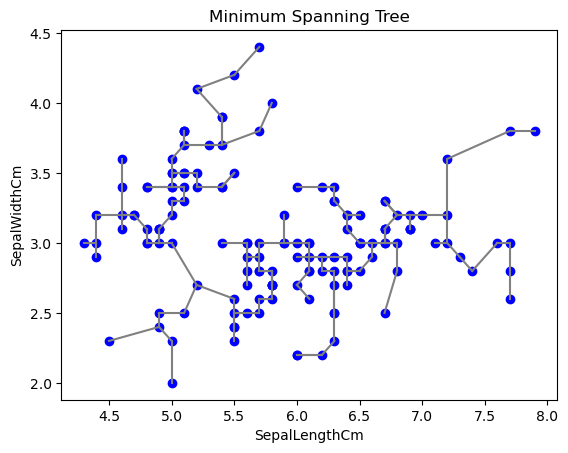

In [21]:
mst = minimum_spanning_tree(dist_matrix)

# Plotting the MST before removing the 2 longest edge
graph_plot(req_features, mst)
plt.title('Minimum Spanning Tree')
plt.show()

### 5. Identify the two longest edges in the MST

In [22]:
max_edges = np.unravel_index(np.argsort(mst, axis=None)[-2:], mst.shape)
max_edges

(array([ 57, 109]), array([ 41, 117]))

In [23]:
# Removing the 2 longest edges
new_mst = mst.copy()
new_mst[max_edges] = 0

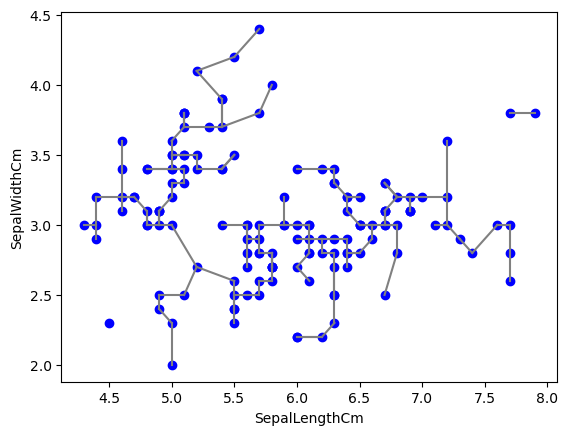

In [24]:
# Plotting the MST after removing the 2 longest edges
graph_plot(req_features, new_mst)
plt.show()